<h2 style="font-family:verdana;text-align:center"> IPL Dataset Analysis</h2>
<hr>
<p style="font-family:verdana;font-size:18px;"> 
    Hey there!! I love cricket and wanted to provide my insights on this dataset. This will be an EDA notebook as I've been meaning to experiment with Plotly.<br>
    Before proceeding further, let me walk you through my approach. There are two angles that I'm considering to bring about my analysis.<br>
    <b> 1. Identify trends pertaining to each team.</b> Eg: Team Combinations, Performance in the powerplay, etc<br>
    <b> 2. Identify trends that occurred during the tournament</b> Eg: Decision of winning the toss, Average first innings scores, etc<br><br> 
    Also, for each topic that I look to cover, I'll have an inference, marked with a '📌' and a conclusion followed by next action represented by a '📢'. I hope to uncover something cool. Let's go!!
</p>
    
   
        

<h3> Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
init_notebook_mode(connected=True)
cf.go_offline(True)

<h3> Starting off with the 2022 season </h3>

In [3]:
df_season_details_2022 = pd.read_csv("../input/indian-premier-league-ipl-all-seasons/2022/season_details.csv")
df_season_summary_2022 = pd.read_csv("../input/indian-premier-league-ipl-all-seasons/2022/season_summary.csv")

In [4]:
df_season_summary_2022.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar


In [5]:
df_season_summary_2022.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [6]:
df_season_summary_2022.iloc[:10,[3,5,6,7,8,9,10,13]]

,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner
0,CSK v KKR,CSK,KKR,KKR,BOWL FIRST,131/5,133/4,KKR
1,DC v MI,DC,MI,DC,BOWL FIRST,177/5,179/6,DC
2,PBKS v RCB,PBKS,RCB,KXIP,BOWL FIRST,205/2,208/5,PBKS
3,GT v LSG,GT,LSG,GT,BOWL FIRST,158/6,161/5,GT
4,SRH v RR,SRH,RR,SRH,BOWL FIRST,210/6,149/7,RR
5,RCB v KKR,RCB,KKR,RCB,BOWL FIRST,128,132/7,RCB
6,LSG v CSK,LSG,CSK,LSG,BOWL FIRST,210/7,211/4,LSG
7,KKR v PBKS,KKR,PBKS,KKR,BOWL FIRST,137,141/4,KKR
8,MI v RR,MI,RR,MI,BOWL FIRST,193/8,170/8,RR
9,GT v DC,GT,DC,DC,BOWL FIRST,171/6,157/9,GT


In [7]:
df_season_summary_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            74 non-null     int64  
 1   id                74 non-null     int64  
 2   name              74 non-null     object 
 3   short_name        74 non-null     object 
 4   description       74 non-null     object 
 5   home_team         74 non-null     object 
 6   away_team         74 non-null     object 
 7   toss_won          74 non-null     object 
 8   decision          74 non-null     object 
 9   1st_inning_score  74 non-null     object 
 10  2nd_inning_score  74 non-null     object 
 11  home_score        74 non-null     object 
 12  away_score        74 non-null     object 
 13  winner            74 non-null     object 
 14  result            74 non-null     object 
 15  start_date        74 non-null     object 
 16  end_date          74 non-null     object 
 17 

In [8]:
df_season_details_2022.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,120,2022,1304047,CSK v KKR,CSK,KKR,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,beaten as he has a wild swing at this full del...,<p>There's a wide slip in place btw</p>,NaN
1,110,2022,1304047,CSK v KKR,CSK,KKR,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,starts with a zippy back of length delivery th...,<p><b>7.28pm </b> Gaikwad and Conway are the o...,NaN
2,140,2022,1304047,CSK v KKR,CSK,KKR,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,terrific delivery. Bolt upright seam to land i...,NaN,NaN
3,130,2022,1304047,CSK v KKR,CSK,KKR,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"slips this back of a length delivery down leg,...",NaN,NaN
4,150,2022,1304047,CSK v KKR,CSK,KKR,CSK,1,1,3,...,1060380.0,Ruturaj Gaikwad,Umesh Yadav,0.0,4.0,RD Gaikwad c Rana b Yadav 0 (5m 4b 0x4 0x6) SR...,False,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN


In [9]:
df_season_details_2022.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [10]:
df_season_details_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17768 entries, 0 to 17767
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         17768 non-null  int64  
 1   season             17768 non-null  int64  
 2   match_id           17768 non-null  int64  
 3   match_name         17768 non-null  object 
 4   home_team          17768 non-null  object 
 5   away_team          17768 non-null  object 
 6   current_innings    17768 non-null  object 
 7   innings_id         17768 non-null  int64  
 8   over               17768 non-null  int64  
 9   ball               17768 non-null  int64  
 10  runs               17768 non-null  int64  
 11  shortText          17768 non-null  object 
 12  isBoundary         17768 non-null  bool   
 13  isWide             17768 non-null  bool   
 14  isNoball           17768 non-null  bool   
 15  batsman1_id        17768 non-null  int64  
 16  batsman1_name      177

<h3> Analysing the impact of the toss on the outcome of the game </h3>

In [11]:
df_toss_bowling = df_season_summary_2022[df_season_summary_2022.decision=="BOWL FIRST"] 
df_toss_batting = df_season_summary_2022[df_season_summary_2022.decision=="BAT FIRST"]

In [12]:
teams_winning_chasing = df_toss_bowling[df_toss_bowling.toss_won == df_toss_bowling.winner]
teams_losing_chasing = df_toss_bowling[df_toss_bowling.toss_won != df_toss_bowling.winner]

len(df_toss_bowling),np.shape(teams_winning_chasing)[0],np.shape(teams_losing_chasing)[0]

(59, 28, 31)

In [13]:
teams_winning_batting = df_toss_batting[df_toss_batting.toss_won == df_toss_batting.winner]
teams_losing_batting = df_toss_batting[df_toss_batting.toss_won != df_toss_batting.winner]

len(df_toss_batting),np.shape(teams_winning_batting)[0],np.shape(teams_losing_batting)[0]

(15, 7, 8)

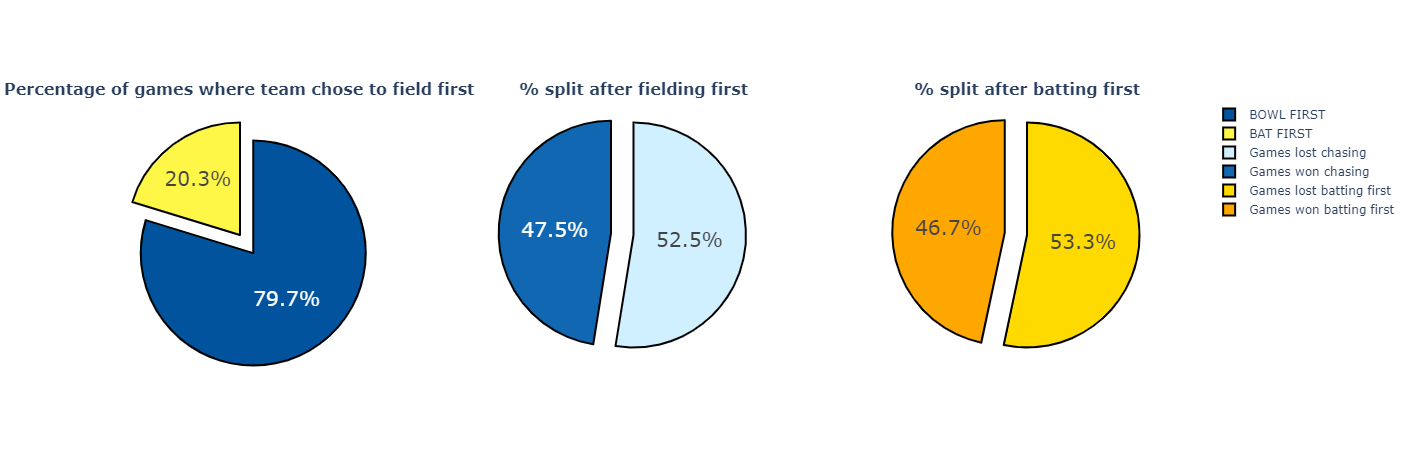

In [14]:
toss_decision_labels = list(df_season_summary_2022.decision.value_counts().index)
toss_decision_values = df_season_summary_2022.decision.value_counts()

teams_chasing_labels = ["Games won chasing","Games lost chasing"]
teams_winning_chasing_values = [np.shape(teams_winning_chasing)[0],np.shape(teams_losing_chasing)[0]]

teams_batting_labels = ['Games won batting first','Games lost batting first']
teams_winning_batting_values = [np.shape(teams_winning_batting)[0],np.shape(teams_losing_batting)[0]]

toss_chart_colors = ["#00539CFF","#FFF748"]
fielding_first_chart_colors = ["#1167B1","#D0EFFF"]
batting_first_chart_colors = ["#FFA701","#FFDA00"]

fig = make_subplots(rows=1,cols=3,specs=[[{"type":"pie"},{"type":"pie"},{"type":"pie"}]],subplot_titles=['<b>Percentage of games where team chose to field first</b>',
                                                                                                         '<b>% split after fielding first</b>',
                                                                                                         '<b>% split after batting first</b>'])

fig.add_trace(go.Pie(labels=toss_decision_labels,values=toss_decision_values,pull=[0.2,0],
                     marker=dict(colors=toss_chart_colors)),row=1,col=1)

fig.add_trace(go.Pie(labels=teams_chasing_labels,values=teams_winning_chasing_values,pull=[0.2,0],
                     marker=dict(colors=fielding_first_chart_colors)),row=1,col=2)

fig.add_trace(go.Pie(labels=teams_batting_labels,values=teams_winning_batting_values,pull=[0.2,0],
                     marker=dict(colors=batting_first_chart_colors)),row=1,col=3)

fig.update_traces(hoverinfo='label+value',textfont_size=20,marker=dict(line=dict(color='#000000', width=2)))
fig.show()

<div style="font-family:verdana; font-size:18px"> 
    <p style="background-color:#FFF748;color:#000000"> 📌 Inference: In ~80% of the games (59/74), the team which has won the toss has decided to field first. However, in those 59 matches, the toss winning side has gone on to lose more games than win. Although circumstances vary with each game - different squads, skills, planning, etc, a similar observation can be made for the other scenario involving the decision to bat first.
    </p><br>
    <p>So, the question that arises is, why is there a stark difference in the toss decision?<br>
       - One possible explanation is to factor the start time of the game. Given that a significant proportion of these matches begin in the evening, it is expected that most sides would consider the due factor. This can be easily verified.
    </p>
</div>

In [15]:
df_season_summary_2022['dn_matches'] = df_season_summary_2022.description.apply(lambda x: 1 if x.find("D/N")!=-1 else 0)
df_season_summary_2022.dn_matches.value_counts()

0    62
1    12
Name: dn_matches, dtype: int64

In [16]:
time_of_match_labels = ["Evening Game - Bowl first","Evening Game - Bat first","D/N - Bowl First","D/N - Bat First"]
time_of_match_values = df_season_summary_2022.groupby(['dn_matches'])['decision'].value_counts().reset_index(drop=True)

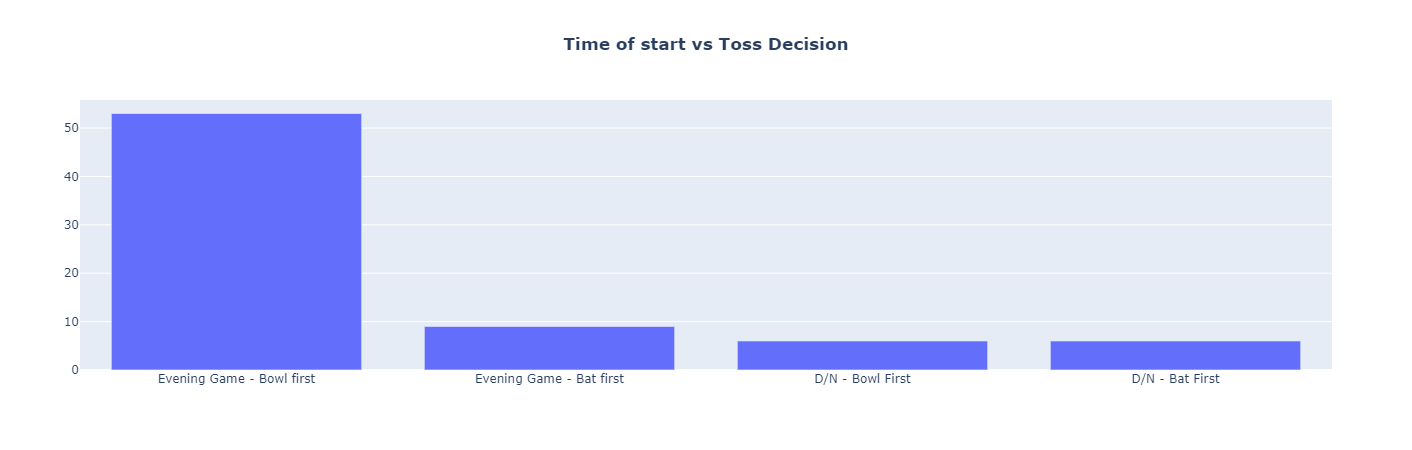

In [17]:
fig = go.Figure(data=[go.Bar(x=time_of_match_labels,y=time_of_match_values)])
fig.update_traces(textposition="inside",textfont=dict(family="verdana",size=10))
fig.update_layout(title_text='<b>Time of start vs Toss Decision</b>',title_x=0.5)
fig.show()

<div style="font-family:verdana; font-size:18px"> 
    <p style="background-color:#FFF748;color:#000000"> 📌 Inference: As indicated above, there is a palpable difference in batting and fielding first for the 8:00 PM kickoff games. Let us dig deeper to check if some teams are better chasers than the rest.
    </p>
</div>

In [18]:
team_toss_split = {}
team_win_split = {}

In [19]:
from collections import Counter

In [20]:
def calculate_wins(x,team):
    if x.winner==team:
        if (x.toss_won==team and x.decision=='BOWL FIRST') or (x.toss_won!=team and x.decision=='BAT FIRST'):
            return 1
        elif (x.toss_won==team and x.decision=='BAT FIRST') or (x.toss_won!=team and x.decision=='BOWL FIRST'):
            return 0
    else:
        return 'lost'

In [21]:
for team in df_season_summary_2022.home_team.unique():
    df_2022_team = df_season_summary_2022[(df_season_summary_2022.home_team==team)|(df_season_summary_2022.away_team==team)]
    bowl_first = dict(Counter(df_2022_team.apply(lambda x: 1 if ((x.toss_won==team and x.decision=='BOWL FIRST') or (x.toss_won!=team and x.decision=='BAT FIRST')) else 0,axis=1)))
    matches_won = dict(Counter(df_2022_team.apply(lambda x: calculate_wins(x,team),axis=1)))

    bowl_first['BOWL FIRST'],bowl_first['BAT FIRST'] = bowl_first[1],bowl_first[0]
    matches_won['BOWL FIRST'],matches_won['BAT FIRST'] = matches_won[1],matches_won[0] 
    del bowl_first[0],bowl_first[1],matches_won[0],matches_won[1],matches_won['lost']
    team_toss_split[team] = bowl_first
    team_win_split[team] = matches_won
    

In [22]:
team_toss_split

{'CSK': {'BOWL FIRST': 4, 'BAT FIRST': 10},
 'DC': {'BOWL FIRST': 9, 'BAT FIRST': 5},
 'PBKS': {'BOWL FIRST': 3, 'BAT FIRST': 11},
 'GT': {'BOWL FIRST': 9, 'BAT FIRST': 7},
 'SRH': {'BOWL FIRST': 11, 'BAT FIRST': 3},
 'RCB': {'BOWL FIRST': 7, 'BAT FIRST': 9},
 'LSG': {'BOWL FIRST': 7, 'BAT FIRST': 8},
 'KKR': {'BOWL FIRST': 9, 'BAT FIRST': 5},
 'MI': {'BOWL FIRST': 9, 'BAT FIRST': 5},
 'RR': {'BOWL FIRST': 4, 'BAT FIRST': 13}}

In [23]:
team_win_split

{'CSK': {'BOWL FIRST': 1, 'BAT FIRST': 3},
 'DC': {'BOWL FIRST': 4, 'BAT FIRST': 3},
 'PBKS': {'BOWL FIRST': 2, 'BAT FIRST': 5},
 'GT': {'BOWL FIRST': 8, 'BAT FIRST': 4},
 'SRH': {'BOWL FIRST': 5, 'BAT FIRST': 1},
 'RCB': {'BOWL FIRST': 4, 'BAT FIRST': 5},
 'LSG': {'BOWL FIRST': 2, 'BAT FIRST': 7},
 'KKR': {'BOWL FIRST': 4, 'BAT FIRST': 2},
 'MI': {'BOWL FIRST': 3, 'BAT FIRST': 1},
 'RR': {'BOWL FIRST': 3, 'BAT FIRST': 7}}

In [24]:
team_colors = {'CSK':'#F9CD05','DC':'#EF1B23','GT':'#00008B','RCB':'#32CD32','PBKS':'#ED1B24','KKR':'#800080','LSG':'#7DF9FF','MI':'#1434A4','SRH':'#FF822A','RR':'#FF69B4'}

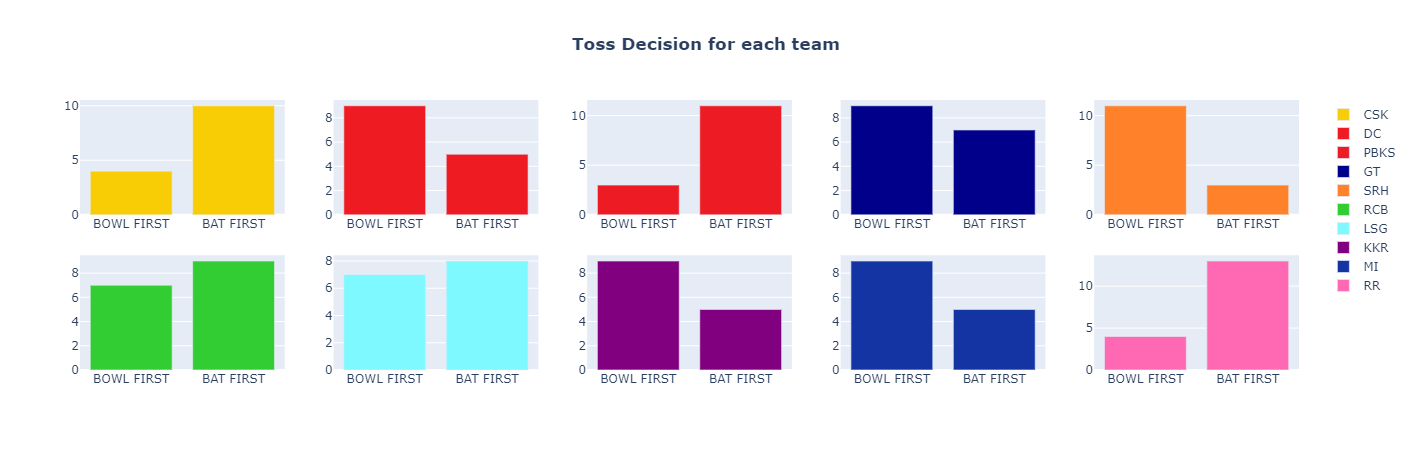

In [25]:
fig = make_subplots(rows=2,cols=5)
row,col = 1,1
for team,decision in team_toss_split.items():
    labels = list(decision.keys())
    values_toss_decision = list(decision.values())
    
    fig.add_trace(go.Bar(x=labels,y=values_toss_decision,marker=dict(color = team_colors[team]),name=team),row=row,col=col)
    col+=1
    if col>5:
        col = 1
        row = 2
        
fig.update_layout(title_text='<b>Toss Decision for each team</b>',title_x=0.5)
fig.show()

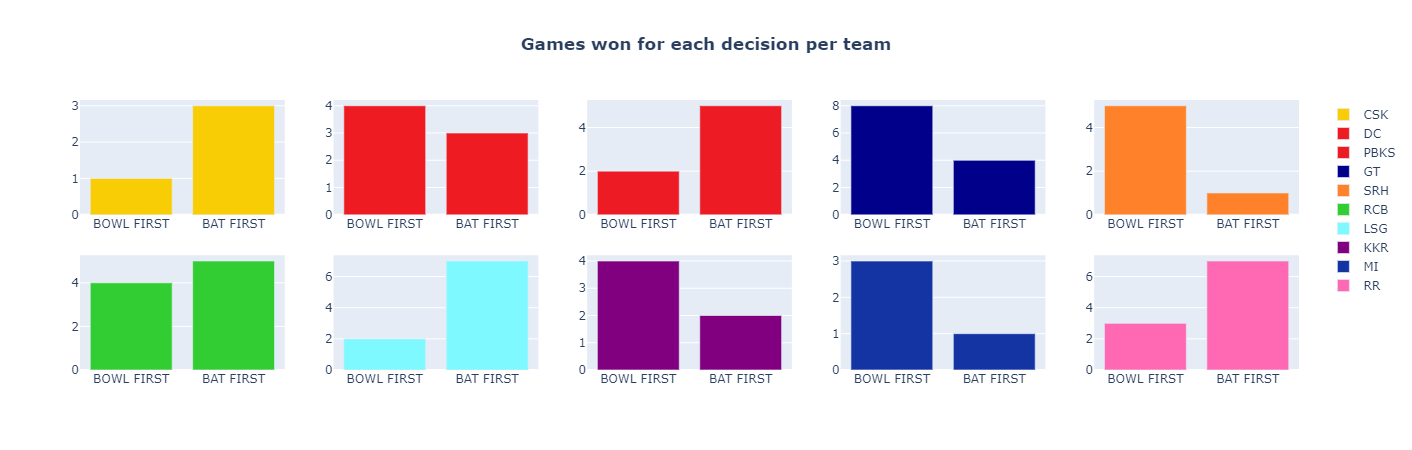

In [26]:
fig = make_subplots(rows=2,cols=5)
row,col = 1,1
for team,decision in team_win_split.items():
    labels = list(decision.keys())
    values_games_won = list(decision.values())
    
    fig.add_trace(go.Bar(x=labels,y=values_games_won,marker=dict(color = team_colors[team]),name=team),row=row,col=col)
    col+=1
    if col>5:
        col = 1
        row = 2
fig.update_layout(title_text='<b>Games won for each decision per team</b>',title_x=0.5)
fig.show()

<div style="background-color:#80d8ff;font-family:verdana; font-size:18px">
    <p>📢 Conclusion: While the decision to field first far outweighs the decision to bat first, certain teams have fared better than the others as they made the most of their opportunities. Therefore, the toss did not have a significant impact on the outcome. For example, GT has chased significantly better than the other sides whereas, teams like RR, LSG, and RCB have won more games batting first.</p>
</div>

<h3> 
    <p> Before looking at specific teams, it is vital to answers some questions pertaining to the common themes across the tournament.<br><br> For instance:<br>  
        1. What was the median target when games were won and lost while batting first and second<br>
        2. How was the performance of teams during the Powerplay in successful chases<br>
        3. How many games were dragged till the final overs and what was average to get in the last 4 overs etc<br><br>
        Obtaining the answers to these questions will help to set the context for realising which players have stood out and guided their team to victory.</p>
</h3>

In [27]:
first_inning_score_winning_chasing = np.array(teams_winning_chasing['1st_inning_score'].apply(lambda x: "".join(x.split("/")[0])).astype(str).astype(int))
first_inning_score_losing_chasing = np.array(teams_losing_chasing['1st_inning_score'].apply(lambda x: "".join(x.split("/")[0])).astype(str).astype(int))
first_inning_score_winning_batting = np.array(teams_winning_batting['1st_inning_score'].apply(lambda x: "".join(x.split("/")[0])).astype(str).astype(int))
first_inning_score_losing_batting = np.array(teams_losing_batting['1st_inning_score'].apply(lambda x: "".join(x.split("/")[0])).astype(str).astype(int))

In [40]:
first_inning_score_summary = make_subplots(rows=1,cols=4,specs=[[{"type":"box"},{"type":"box"},{"type":"box"},{"type":"box"}]],shared_yaxes=True)

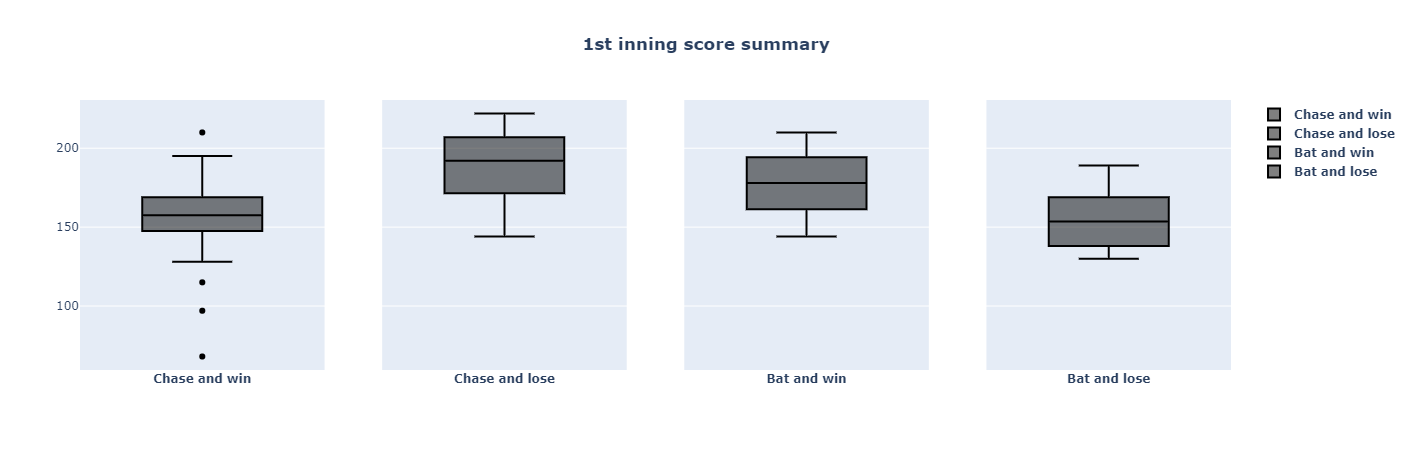

In [41]:
first_inning_score_summary.add_trace(go.Box(y=first_inning_score_winning_chasing,name='<b>Chase and win</b>',marker=dict(color='#000000')),row=1,col=1)
first_inning_score_summary.add_trace(go.Box(y=first_inning_score_losing_chasing,name='<b>Chase and lose</b>',marker=dict(color='#000000')),row=1,col=2)
first_inning_score_summary.add_trace(go.Box(y=first_inning_score_winning_batting,name='<b>Bat and win</b>',marker=dict(color='#000000')),row=1,col=3)
first_inning_score_summary.add_trace(go.Box(y=first_inning_score_losing_batting,name='<b>Bat and lose</b>',marker=dict(color='#000000')),row=1,col=4)

first_inning_score_summary.update_layout(title_text = '<b>1st inning score summary</b>',title_x = 0.5,
                                         hoverlabel=dict(bgcolor="white",font_size=12,font_family='verdana',font_color='black'))
first_inning_score_summary.show()